In [2]:
!pip install auto_ts

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (25, 6)
mpl.rcParams['axes.grid'] = False

In [7]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv('https://raw.githubusercontent.com/virabhra/Covid19/master/KA.csv', parse_dates = ['Date'],date_parser=parse)

df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       106 non-null    datetime64[ns]
 1   Death                      106 non-null    int64         
 2   Cured/Discharged/Migrated  106 non-null    int64         
 3   New cases                  106 non-null    int64         
 4   New deaths                 106 non-null    int64         
 5   New recovered              106 non-null    int64         
 6   Total Confirmed cases      106 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.9 KB


In [8]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  106
Columns  :  7

Features : 
 ['Date', 'Death', 'Cured/Discharged/Migrated', 'New cases', 'New deaths', 'New recovered', 'Total Confirmed cases']

Missing values :   Date                         False
Death                        False
Cured/Discharged/Migrated    False
New cases                    False
New deaths                   False
New recovered                False
Total Confirmed cases        False
dtype: bool

Unique values :  
 Date                         106
Death                         54
Cured/Discharged/Migrated     84
New cases                     69
New deaths                    10
New recovered                 53
Total Confirmed cases         96
dtype: int64


In [9]:
ec_df = df.set_index('Date')

In [10]:
ec_df.head()

,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Total Confirmed cases
Date,,,,,,
2020-03-09,0,0,0,0,0,1
2020-03-10,0,0,3,0,0,4
2020-03-11,0,0,0,0,0,4
2020-03-12,1,0,0,1,0,4
2020-03-13,1,0,1,0,0,5


In [11]:
ec_data = ec_df['Total Confirmed cases']
ec_data.head()

Date
2020-03-09    1
2020-03-10    4
2020-03-11    4
2020-03-12    4
2020-03-13    5
Name: Total Confirmed cases, dtype: int64

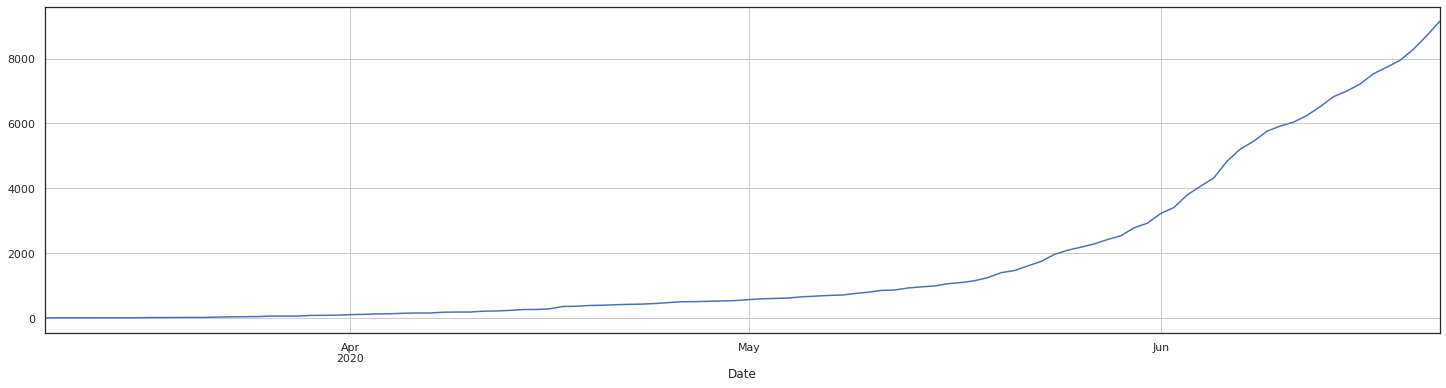

In [12]:
ec_data.plot(grid=True)

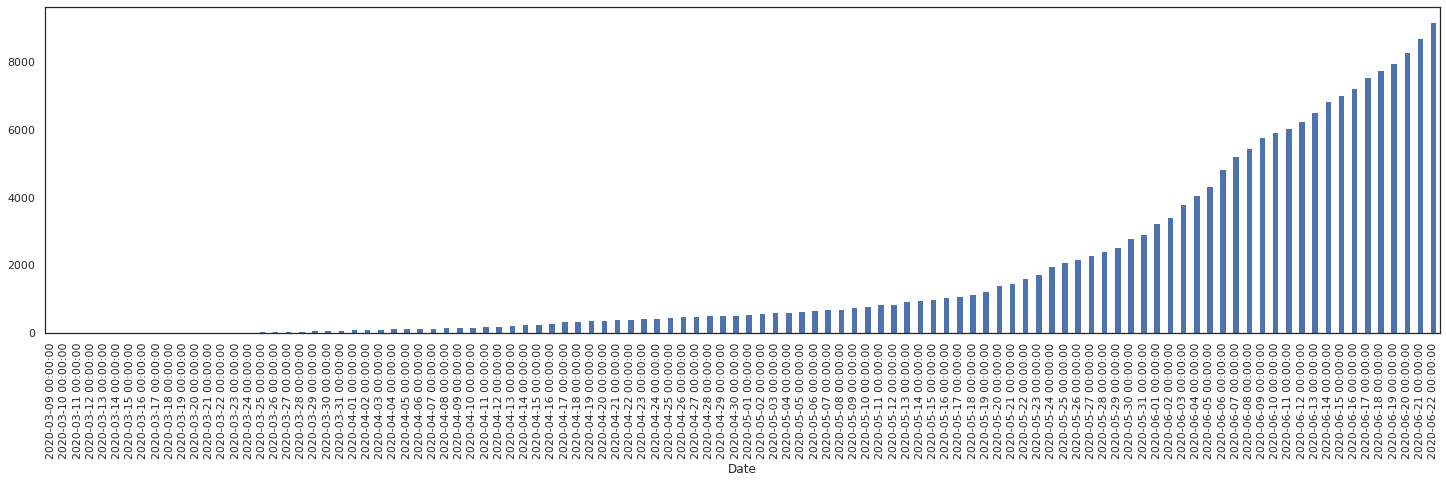

In [19]:
ec_df_2020=ec_df.loc['2020']
ec_data_2020=ec_df_2020['Total Confirmed cases']
ec_data_2020.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd884cd80b8>,
      dtype=object)

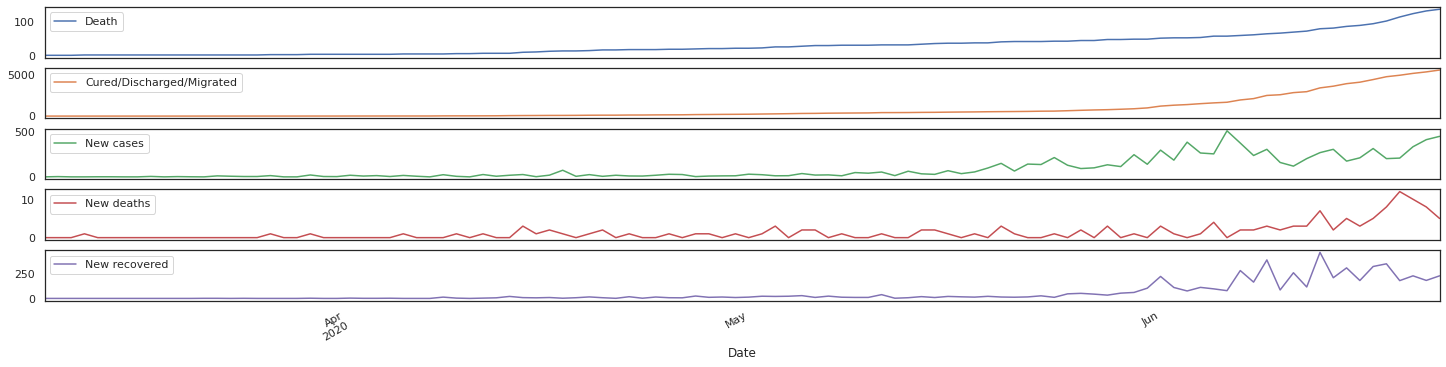

In [13]:
ec_df_2020=ec_df.loc['2020']
ec_data_2020=ec_df_2020[['Death','Cured/Discharged/Migrated','New cases','New deaths','New recovered']]
ec_data_2020.plot(subplots=True)

In [14]:
final_df = df.copy()

In [15]:
final_df.head(10)

,Date,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Total Confirmed cases
0,2020-03-09,0,0,0,0,0,1
1,2020-03-10,0,0,3,0,0,4
2,2020-03-11,0,0,0,0,0,4
3,2020-03-12,1,0,0,1,0,4
4,2020-03-13,1,0,1,0,0,5
5,2020-03-14,1,0,1,0,0,6
6,2020-03-15,1,0,0,0,0,6
7,2020-03-16,1,0,0,0,0,6
8,2020-03-17,1,0,5,0,0,11
9,2020-03-18,1,0,0,0,0,11


In [16]:
final_df=final_df[['Date','Death','Cured/Discharged/Migrated','New cases','New deaths','New recovered','Total Confirmed cases']]

In [17]:
train = final_df[:106]
test = final_df[22:]
print(train.shape, test.shape)
train.head()

(106, 7) (84, 7)


,Date,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Total Confirmed cases
0,2020-03-09,0,0,0,0,0,1
1,2020-03-10,0,0,3,0,0,4
2,2020-03-11,0,0,0,0,0,4
3,2020-03-12,1,0,0,1,0,4
4,2020-03-13,1,0,1,0,0,5


In [18]:
ts_column = 'Date'
sep = ','
target = 'Total Confirmed cases'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (106, 6)
    Target variable = Total Confirmed cases
Time series input in days = 1
it is a Daily time series.

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
             Total Confirmed cases  Death  ...  New deaths  New recovered
Date                                      ...                           
2020-03-09                      1      0  ...           0              0

[1 rows x 6 columns]
Time Series data: sample row after transformation
           ds  y  Death  ...  New cases  New deaths  New recovered
0 2020-03-09  1      0  ...          0           0              0

[1 rows x 7 columns]
    Fit-Predict data (shape=(106, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 6


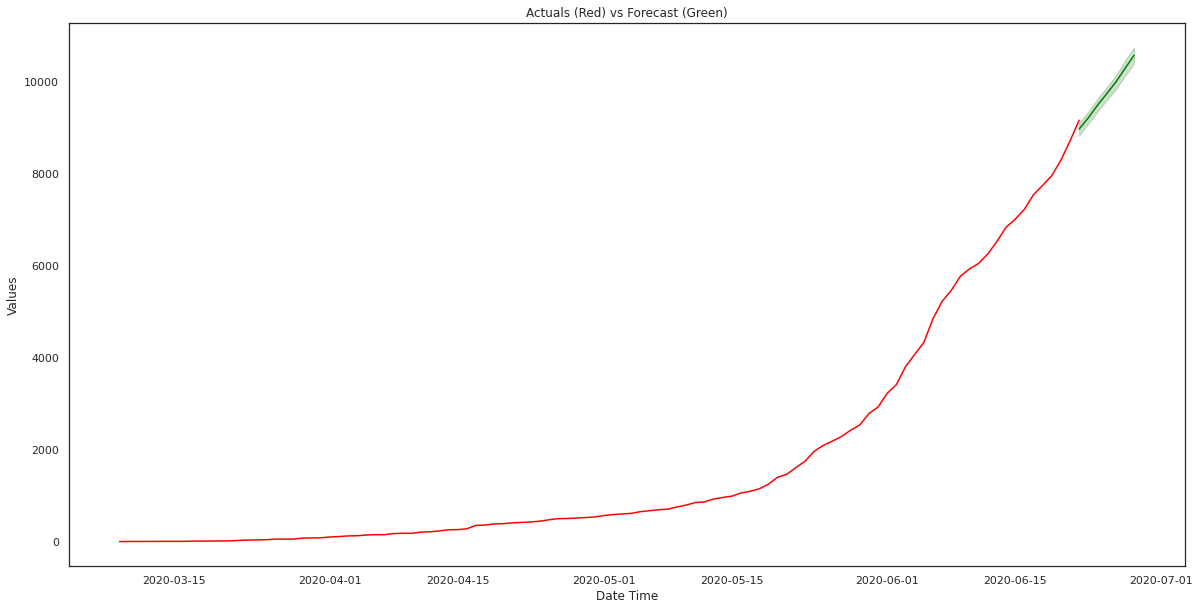

    RMSE = 191.36
    Std Deviation of Originals = 2,469.35
    Normalized RMSE = 8%

Running PyFlux Model...
Data Set split into train (100, 6) and test (6, 6) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (3, 1, 3)


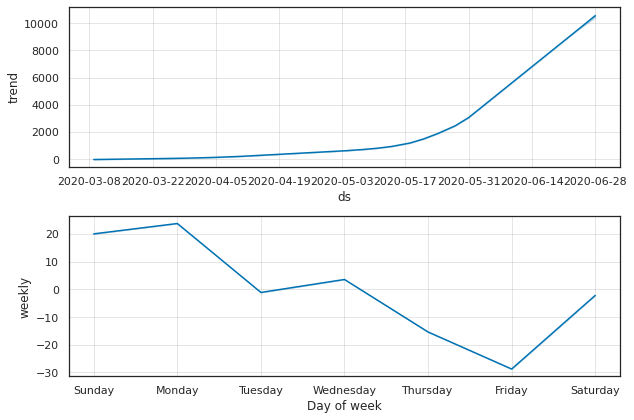

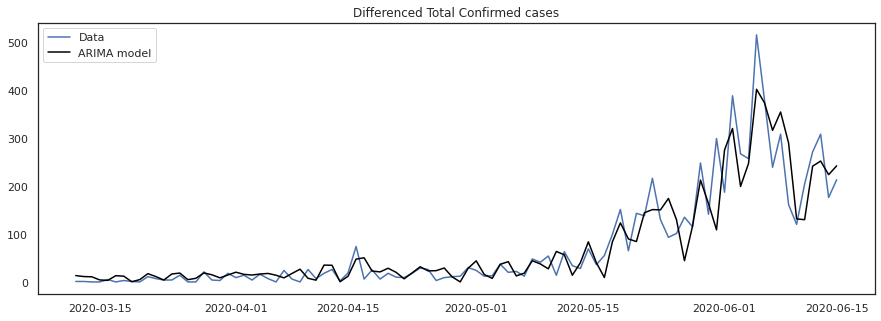

Normal ARIMA(3,1,3)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Total Confirmed cases   Method: MLE                                       
Start Date: 2020-03-12 00:00:00                         Log Likelihood: -487.7981                         
End Date: 2020-06-16 00:00:00                           AIC: 991.5961                                     
Number of observations: 96                              BIC: 1012.1109                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 10.7109    0.2489     43.027   0.0      (10.223 | 11.1988)       
AR(1)                                

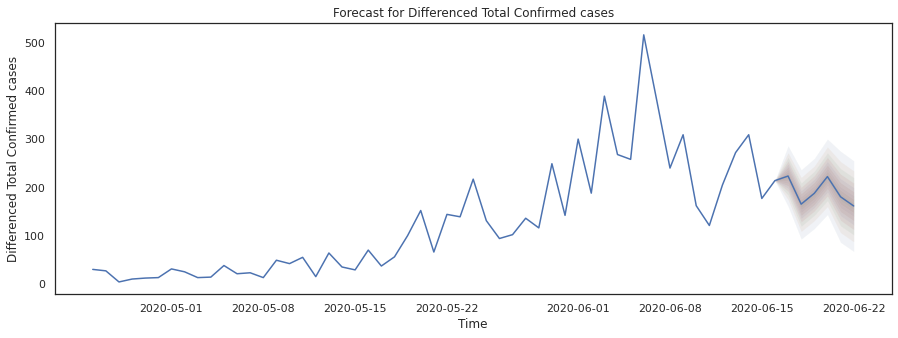

Dynamic 6-period Forecasts:
    RMSE = 1,000.62
    Std Deviation of Originals = 1,939.38
    Normalized RMSE = 52%

Running Non Seasonal ARIMA Model...
Data Set split into train (100,) and test (6,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 1098.069

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 1, MA order q = 1, Interim metric = 1067.576

Best model is: Non Seasonal ARIMA(1,1,1), aic = 1067.576
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 6-period Forecasts:


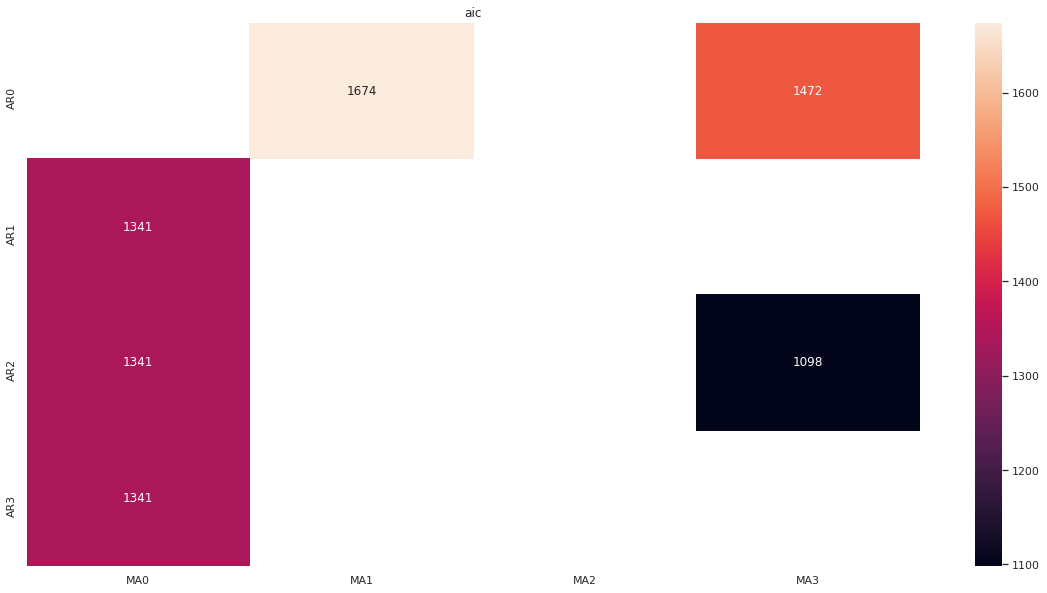

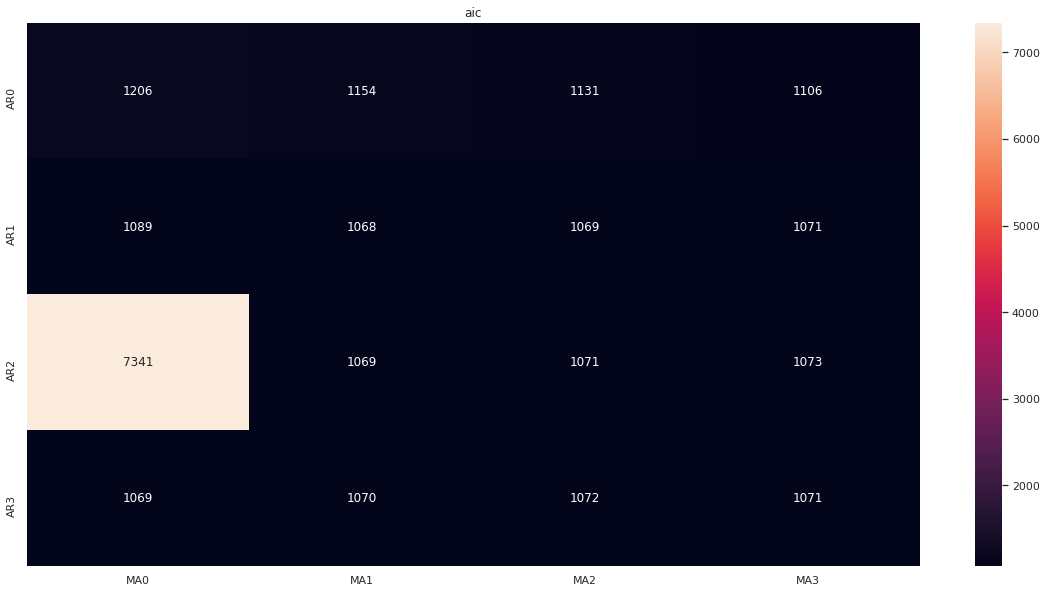

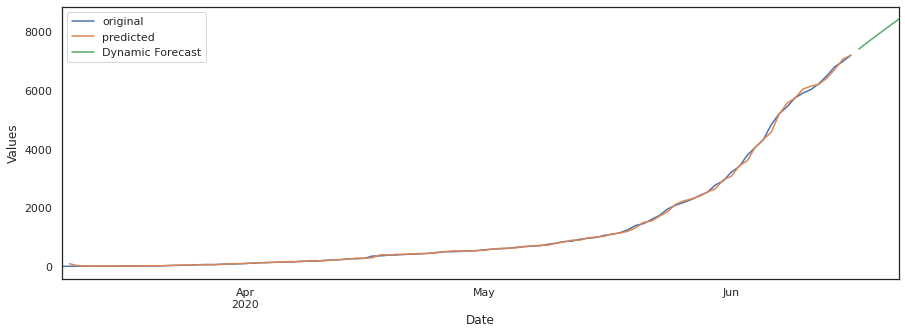

                                ARIMA Model Results                                
Dep. Variable:     D.Total Confirmed cases   No. Observations:                   99
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -529.788
Method:                                mle   S.D. of innovations             50.562
Date:                     Mon, 22 Jun 2020   AIC                           1067.576
Time:                             18:22:34   BIC                           1077.957
Sample:                         03-10-2020   HQIC                          1071.776
                              - 06-16-2020                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            89.1675     69.494      1.283      0.203     -47.037     225.372
ar.L1.D.Total Confirmed cases     

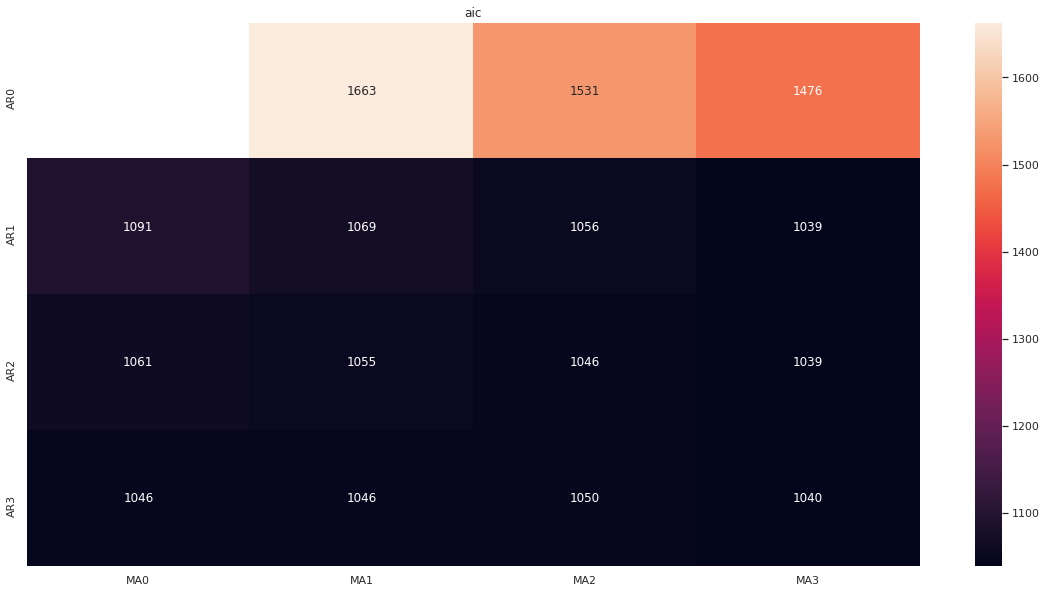

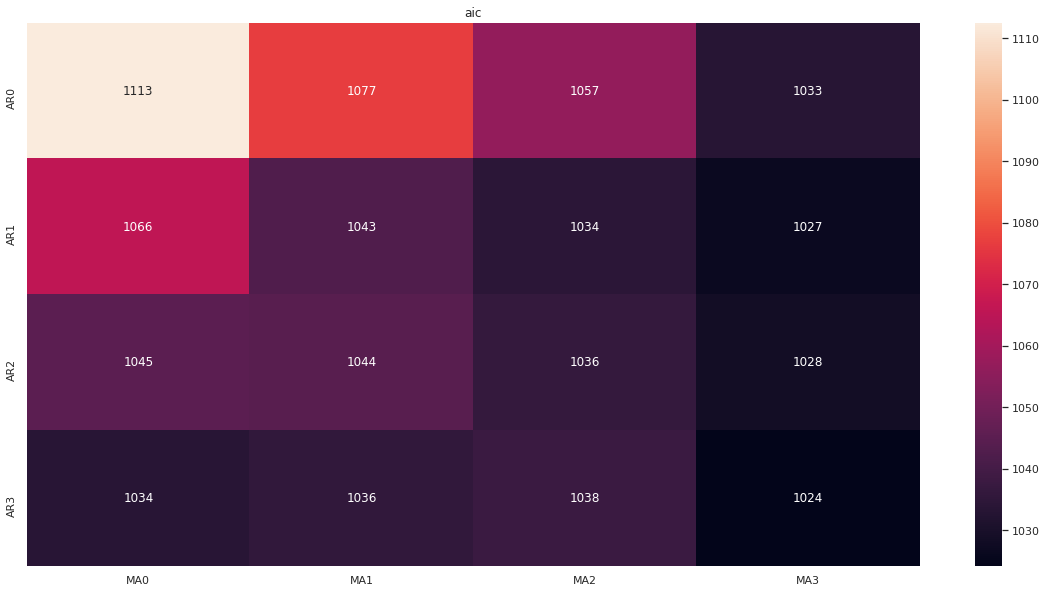

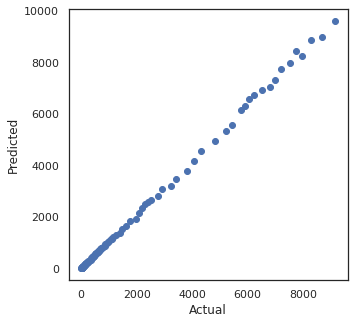

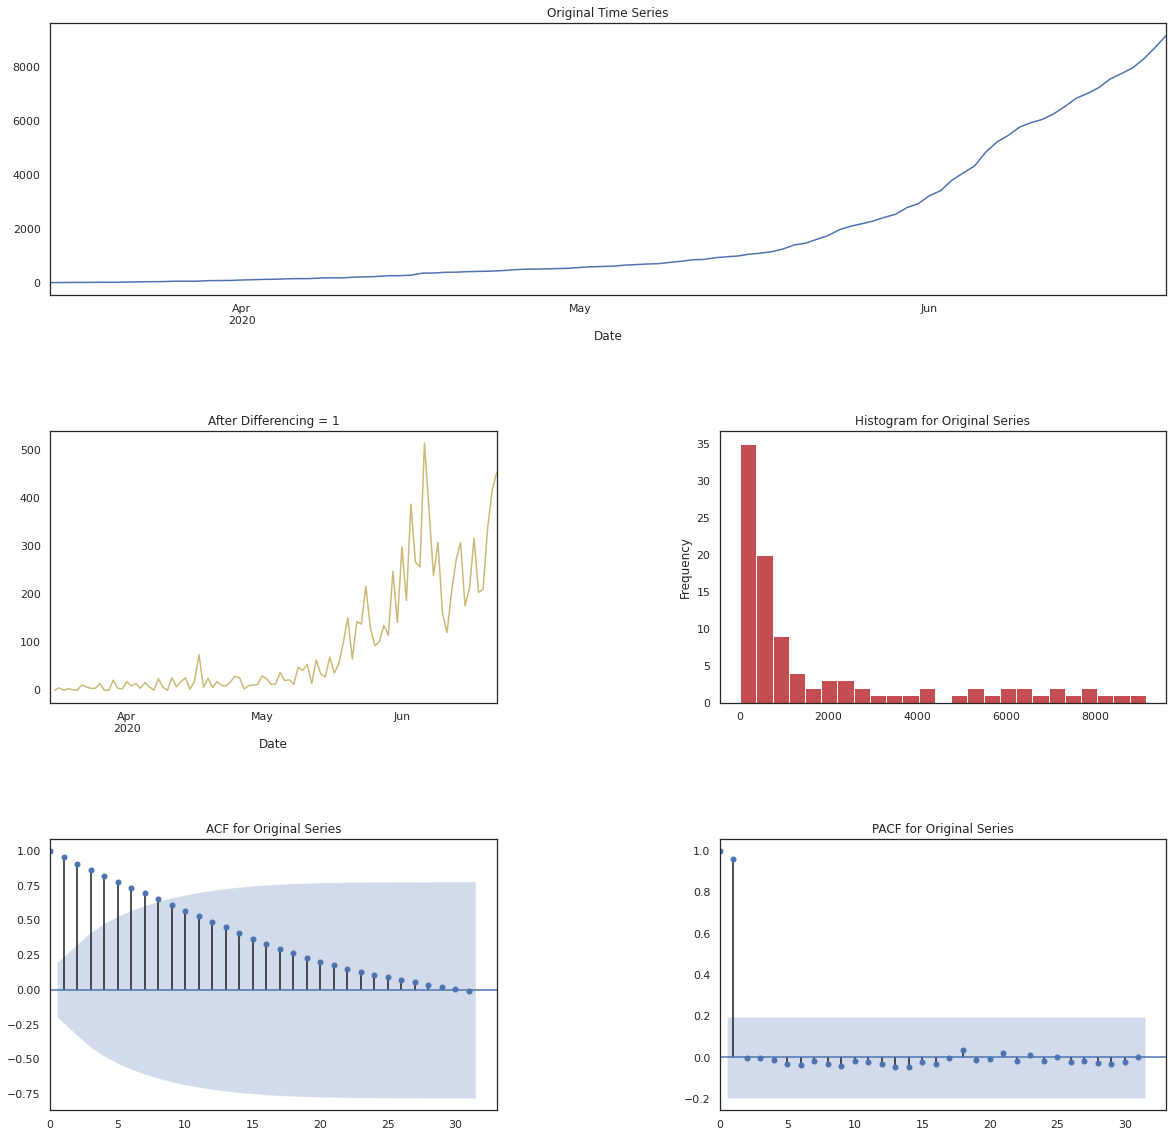


Best Model is:
    FB_Prophet
    Best Model Forecasts: [-1.40794504e-01 -2.04425237e+01 -1.11766860e+01 -2.55462111e+01
 -3.43368936e+01 -3.17863504e+00  2.36209615e+01  3.19368553e+01
  1.16351322e+01  2.09009758e+01  6.53145663e+00 -2.25920385e+00
  2.88990767e+01  5.56986951e+01  6.43234628e+01  4.43306069e+01
  5.39053178e+01  3.98446658e+01  3.23482331e+01  6.48007413e+01
  9.28945874e+01  1.04070379e+02  8.66285471e+01  9.87542819e+01
  8.96727680e+01  8.61700974e+01  1.22616368e+02  1.54703976e+02
  1.70749486e+02  1.58177373e+02  1.75172827e+02  1.70511592e+02
  1.71429201e+02  2.12295751e+02  2.52263580e+02  2.73747707e+02
  2.66614210e+02  2.89048280e+02  2.87930942e+02  2.92392447e+02
  3.36802893e+02  3.76854694e+02  3.98422794e+02  3.91373269e+02
  4.13891315e+02  4.12773997e+02  4.17235523e+02  4.61646353e+02
  5.01698520e+02  5.23266985e+02  5.16217826e+02  5.38922305e+02
  5.37991421e+02  5.42639381e+02  5.87641176e+02  6.28284309e+02
  6.50443740e+02  6.49066835e+02 

In [19]:
ml_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            non_seasonal_pdq=None, seasonality=True,
                            seasonal_PDQ=None, model_type='best',
                            verbose=1)

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (106, 6)
    Target variable = Total Confirmed cases
Time series input in days = 1
it is a Daily time series.

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
             Total Confirmed cases  Death  ...  New deaths  New recovered
Date                                      ...                           
2020-03-09                      1      0  ...           0              0

[1 rows x 6 columns]
Time Series data: sample row after transformation
           ds  y  Death  ...  New cases  New deaths  New recovered
0 2020-03-09  1      0  ...          0           0              0

[1 rows x 7 columns]
    Fit-Predict data (shape=(106, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 6


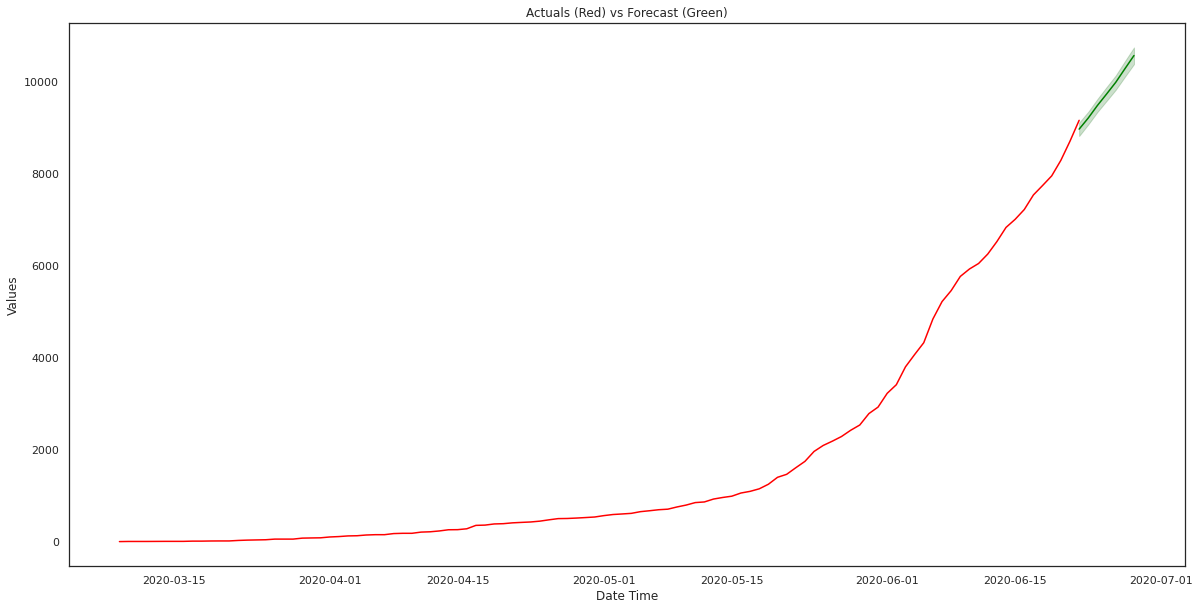

    RMSE = 191.36
    Std Deviation of Originals = 2,469.35
    Normalized RMSE = 8%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 6-period Forecasts:
    RMSE = 1,000.62
    Std Deviation of Originals = 1,939.38
    Normalized RMSE = 52%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 1098.069

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 1, MA order q = 1, Interim metric = 1067.576

Best model is: Non Seasonal ARIMA(1,1,1), aic = 1067.576
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 6-period Forecasts:
                                ARIMA Model Results                                
Dep. Variable:     D.Total Confirmed cases   No. Observat

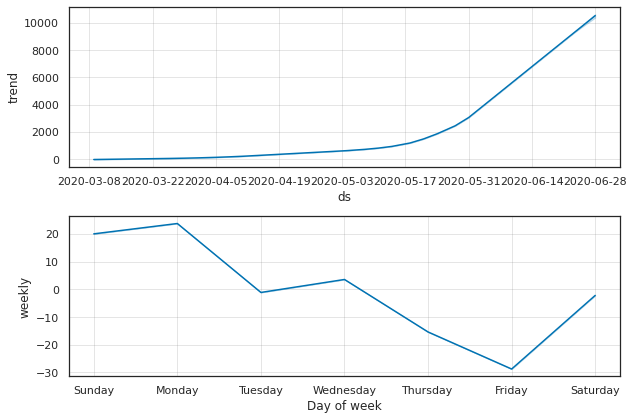

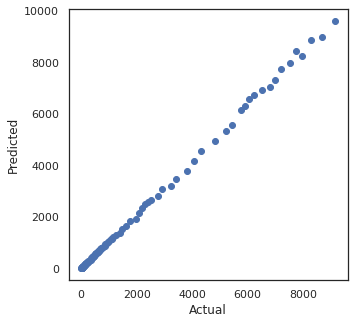

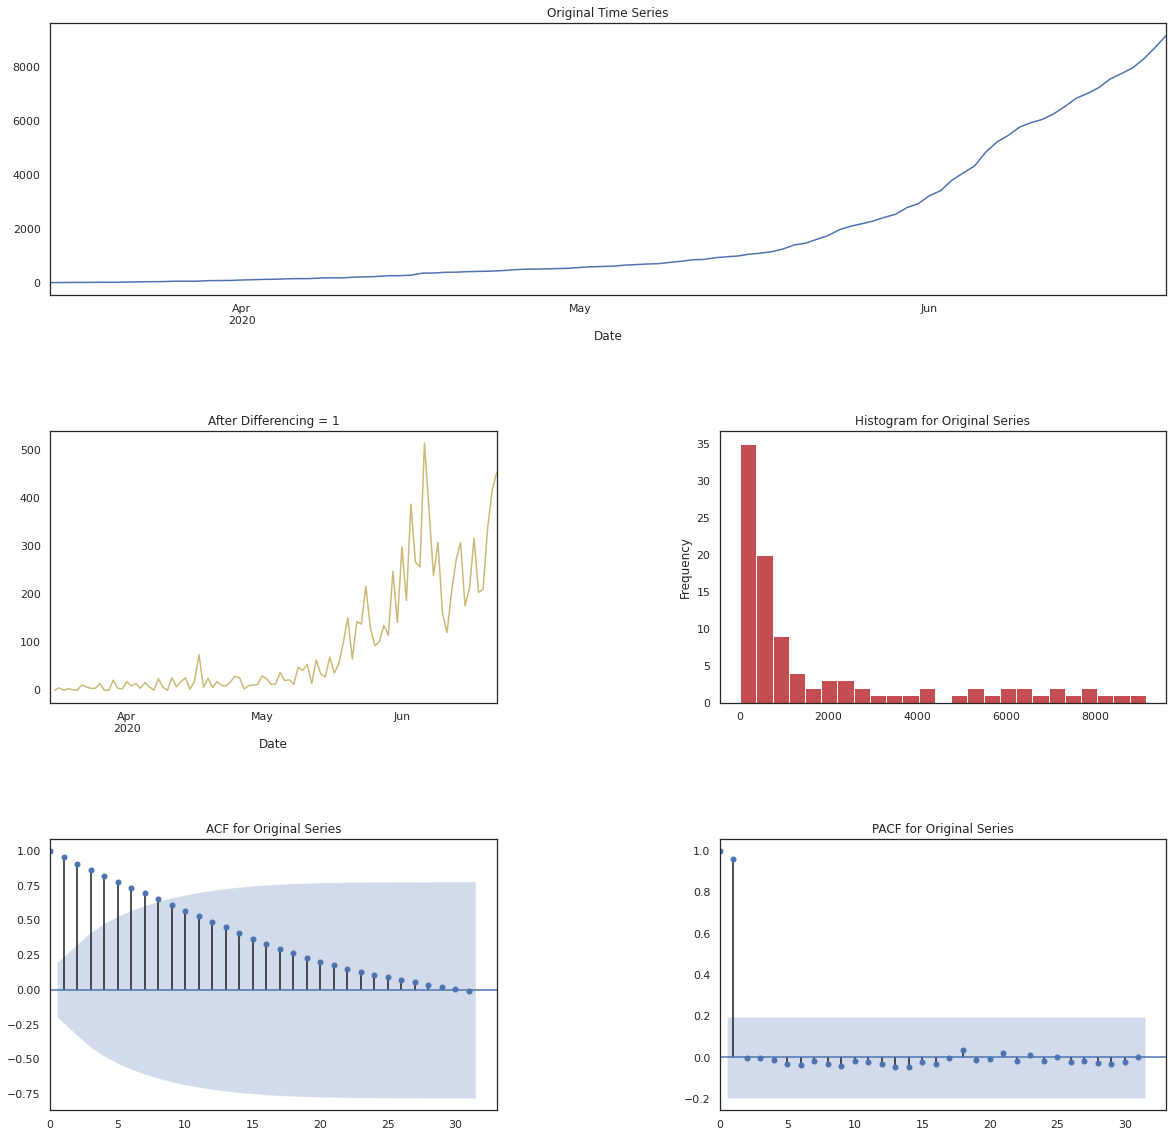


Best Model is:
    FB_Prophet
    Best Model Forecasts: [-1.40794504e-01 -2.04425237e+01 -1.11766860e+01 -2.55462111e+01
 -3.43368936e+01 -3.17863504e+00  2.36209615e+01  3.19368553e+01
  1.16351322e+01  2.09009758e+01  6.53145663e+00 -2.25920385e+00
  2.88990767e+01  5.56986951e+01  6.43234628e+01  4.43306069e+01
  5.39053178e+01  3.98446658e+01  3.23482331e+01  6.48007413e+01
  9.28945874e+01  1.04070379e+02  8.66285471e+01  9.87542819e+01
  8.96727680e+01  8.61700974e+01  1.22616368e+02  1.54703976e+02
  1.70749486e+02  1.58177373e+02  1.75172827e+02  1.70511592e+02
  1.71429201e+02  2.12295751e+02  2.52263580e+02  2.73747707e+02
  2.66614210e+02  2.89048280e+02  2.87930942e+02  2.92392447e+02
  3.36802893e+02  3.76854694e+02  3.98422794e+02  3.91373269e+02
  4.13891315e+02  4.12773997e+02  4.17235523e+02  4.61646353e+02
  5.01698520e+02  5.23266985e+02  5.16217826e+02  5.38922305e+02
  5.37991421e+02  5.42639381e+02  5.87641176e+02  6.28284309e+02
  6.50443740e+02  6.49066835e+02 

In [20]:
ml_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            non_seasonal_pdq=None, seasonality=True,
                            seasonal_PDQ=None, model_type='best',
                            verbose=2)

In [21]:
ml_dict['FB_Prophet']['forecast']

array([-1.40794504e-01, -2.04425237e+01, -1.11766860e+01, -2.55462111e+01,
       -3.43368936e+01, -3.17863504e+00,  2.36209615e+01,  3.19368553e+01,
        1.16351322e+01,  2.09009758e+01,  6.53145663e+00, -2.25920385e+00,
        2.88990767e+01,  5.56986951e+01,  6.43234628e+01,  4.43306069e+01,
        5.39053178e+01,  3.98446658e+01,  3.23482331e+01,  6.48007413e+01,
        9.28945874e+01,  1.04070379e+02,  8.66285471e+01,  9.87542819e+01,
        8.96727680e+01,  8.61700974e+01,  1.22616368e+02,  1.54703976e+02,
        1.70749486e+02,  1.58177373e+02,  1.75172827e+02,  1.70511592e+02,
        1.71429201e+02,  2.12295751e+02,  2.52263580e+02,  2.73747707e+02,
        2.66614210e+02,  2.89048280e+02,  2.87930942e+02,  2.92392447e+02,
        3.36802893e+02,  3.76854694e+02,  3.98422794e+02,  3.91373269e+02,
        4.13891315e+02,  4.12773997e+02,  4.17235523e+02,  4.61646353e+02,
        5.01698520e+02,  5.23266985e+02,  5.16217826e+02,  5.38922305e+02,
        5.37991421e+02,  

In [22]:
test.head()

,Date,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Total Confirmed cases
22,2020-03-31,3,5,3,0,0,83
23,2020-04-01,3,8,18,0,3,101
24,2020-04-02,3,9,9,0,1,110
25,2020-04-03,3,10,14,0,1,124
26,2020-04-04,3,12,4,0,2,128
